# Richardson Extrapolation
In this notebook, we iteratively apply Richardson extrapolation to the first forward differences formula, producing functions for new difference formulae with better error characteristics.

By way of demonstration, we apply these difference formulae to the approximation of the derivative to the sine function at $x_{0} = 0.6$, and plot the absolute error w.r.t the exact derivative.

In [1]:
from typing import Callable
from functools import partial

import numpy as np
import matplotlib.pyplot as plt

This is the workhorse of the notebook: the `richardson_extrapolation` function.

It takes as arguments a function of one variable, `f` ($A{(h)}$ in the lecture slides) and an integer value `k`, the order of the leading error term in $h$.

It returns a new function of one variable, `extrapolated_function`.

Your job is to complete the `richardson_extrapolation` function.

In [2]:
def richardson_extrapolation(f: Callable[[float], float], k: int) -> Callable[[float], float]:
    """
    Apply Richardson extrapolation the function f(h) to remove the error term in order h**k.
    """
    
    def extrapolated_function(h: float) -> float:
        return (2 ** k * f(h / 2) - f(h)) / (2 ** k - 1)
        
    return extrapolated_function

We will first test the `richardson_extrapolation` function with the first forward differences formula.

In [3]:
def first_forward_difference(f: Callable[[float], float], x: float, h: float) -> float:
    """
    first forward differences of f at point x with step size h
    """
    return (f(x + h) - f(x)) / h


def first_central_difference(f: Callable[[float], float], x: float, h: float) -> float:
    """
    first central differences of f at point x with step size h
    """
    return (f(x + h) - f(x - h)) / (2 * h)


def first_complex_difference(f: Callable[[complex], complex], x: float, h: float) -> float:
    """
    first complex differences of Callable[[float], float] f at point x with step size h*1j
    """
    return (f(x+1j*h)/h).imag

We set up the function to differentiate, `f`, its true derivative, `df`, and the point, `x0`, at which the derivative is to be approximated.

In [4]:
f = np.sin
df = np.cos
x0 = 0.6

Then we choose the difference function. We use partial application *via* `functools.partial` to make a function of only one variable, `h`.

In [13]:
difference_function = first_central_difference
difference_function_name = difference_function.__name__.replace("_", " ")
applied_difference_function = partial(difference_function, f, x0)

If you have correctly implemented the `richardson_extrapolation` function, the following cell will plot the error in the approximation for the first forward difference formula as well as the first five extrapolations of the same.

Save and upload your plot.

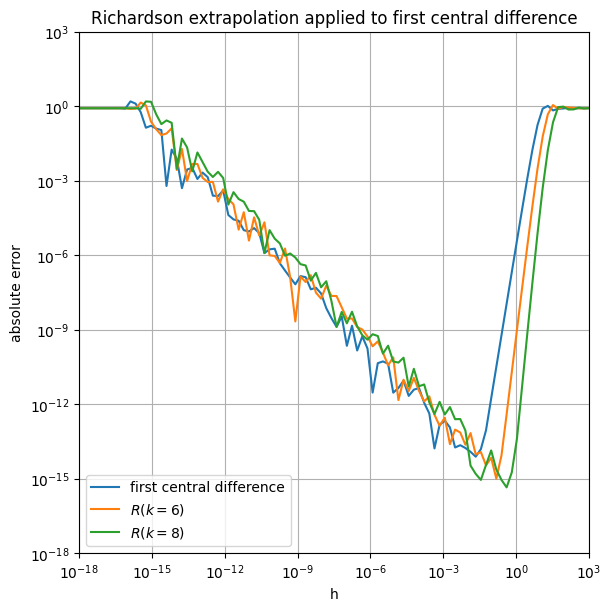

In [15]:
h = np.logspace(-18,3,100)

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(6, 6))
# make the plot presentable
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(h.min(), h.max())
ax.set_ylim(h.min(), h.max())
ax.set_xlabel("h")
ax.set_ylabel("absolute error")
ax.grid()
ax.set_title(f"Richardson extrapolation applied to {difference_function_name}")

# plot the error in the original approximation
error = abs(applied_difference_function(h) - df(x0))
ax.plot(h, error, label=difference_function_name)

# apply the extrapolation to remove error terms up to h**5,
# and plot the error in the new approximations
for k in range(6, 10, 2):
    applied_difference_function = richardson_extrapolation(applied_difference_function, k)
    error = abs(applied_difference_function(h) - df(x0))
    ax.plot(h, error, label=f"$R{{(k={k})}}$")

ax.legend()

Modify the code to extrapolate other difference formulae we have studied. What do you notice?